## Library

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml


## Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cek Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Assignment-1_Data.csv', sep =";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.head() #melihat keseluruhan dataframe

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [5]:
data.shape #melihat banyak baris dan kolom

(522064, 7)

In [6]:
data.dtypes #melihat type data

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price          object
CustomerID    float64
Country        object
dtype: object

In [7]:
data["Date"] = data["Date"].astype('datetime64[ns]')

In [8]:
data.dtypes

BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                 object
CustomerID           float64
Country               object
dtype: object

In [9]:
data.sort_values(by=["Date"]).head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,"7,65",17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,"4,25",17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,"1,85",17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,"1,85",17850.0,United Kingdom
24,536368,BLUE COAT RACK PARIS FASHION,3,2010-01-12 08:34:00,"4,95",13047.0,United Kingdom


In [10]:
print("Menampilkan data ke 5 sampai kurang dari 10 dalam satu baris:")

print(data.iloc[5:10]) #Iloc berfungsi Menampilkan data dalam range tertentu

Menampilkan data ke 5 sampai kurang dari 10 dalam satu baris:
   BillNo                           Itemname  Quantity                Date  \
5  536365       SET 7 BABUSHKA NESTING BOXES         2 2010-01-12 08:26:00   
6  536365  GLASS STAR FROSTED T-LIGHT HOLDER         6 2010-01-12 08:26:00   
7  536366             HAND WARMER UNION JACK         6 2010-01-12 08:28:00   
8  536366          HAND WARMER RED POLKA DOT         6 2010-01-12 08:28:00   
9  536367      ASSORTED COLOUR BIRD ORNAMENT        32 2010-01-12 08:34:00   

  Price  CustomerID         Country  
5  7,65     17850.0  United Kingdom  
6  4,25     17850.0  United Kingdom  
7  1,85     17850.0  United Kingdom  
8  1,85     17850.0  United Kingdom  
9  1,69     13047.0  United Kingdom  


In [11]:
data.duplicated().sum() #Mengecek apakah ada duplikasi data

5284

In [12]:
data.isnull().sum() #Mengecek seberapa banyak data yang kosong

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

## Preprocessing

### Cek apakah ada data bernilai 0

In [13]:
#Let's convert the 0’s into NaN by using .replace() method
for i in range(1,6):
    data.iloc[:, i].replace(0, np.nan, inplace=True)

In [14]:
#Again checking how much data in our dataset is mentioned as 0:
(data.iloc[:,1:6] == 0).sum()

Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
dtype: int64

In [15]:
#let’s again for confirmation, check our dataset using .head() method and print the top 10 rows
data.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,"7,65",17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,"4,25",17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,"1,85",17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,"1,85",17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,"1,69",13047.0,United Kingdom


In [16]:
print("Menampilkan data ke 5 sampai kurang dari 10 dalam satu baris:")

print(data.iloc[5:10]) #Iloc berfungsi Menampilkan data dalam range tertentu

Menampilkan data ke 5 sampai kurang dari 10 dalam satu baris:
   BillNo                           Itemname  Quantity                Date  \
5  536365       SET 7 BABUSHKA NESTING BOXES         2 2010-01-12 08:26:00   
6  536365  GLASS STAR FROSTED T-LIGHT HOLDER         6 2010-01-12 08:26:00   
7  536366             HAND WARMER UNION JACK         6 2010-01-12 08:28:00   
8  536366          HAND WARMER RED POLKA DOT         6 2010-01-12 08:28:00   
9  536367      ASSORTED COLOUR BIRD ORNAMENT        32 2010-01-12 08:34:00   

  Price  CustomerID         Country  
5  7,65     17850.0  United Kingdom  
6  4,25     17850.0  United Kingdom  
7  1,85     17850.0  United Kingdom  
8  1,85     17850.0  United Kingdom  
9  1,69     13047.0  United Kingdom  


### Menghapus nilai null

In [17]:
#The above process is not generally advised because it will delete all observations where any of variables is missing ultimately reducing the size of our dataset and quality of our model.
data = data.dropna()

In [18]:
#Checking how much data is left after using .dropna() method
data.shape

(388023, 7)

### Menghapus spasi, normalisasi huruf kecil, mengubah tipe data

In [19]:
# Preprocessing
data["Itemname"] = data["Itemname"].str.strip() # hapus spasi yang tidak perlu
data['Itemname'] = data["Itemname"].str.lower() # normalisasi huruf kecil
data["BillNo"] = data["BillNo"].astype("str") # Ubah tipe data
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,white hanging heart t-light holder,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom
1,536365,white metal lantern,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
2,536365,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom
3,536365,knitted union flag hot water bottle,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
4,536365,red woolly hottie white heart.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom


In [20]:
data['Itemname'].nunique()

3846

##Cek perubahan yang terjadi

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388023 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      388023 non-null  object        
 1   Itemname    388023 non-null  object        
 2   Quantity    388023 non-null  int64         
 3   Date        388023 non-null  datetime64[ns]
 4   Price       388023 non-null  object        
 5   CustomerID  388023 non-null  float64       
 6   Country     388023 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 23.7+ MB
None


## Data Visualisasi

In [22]:
# rank the top 10 best-selling items
data.Itemname.value_counts(normalize=True)[:10]

white hanging heart t-light holder    0.005092
regency cakestand 3 tier              0.004234
jumbo bag red retrospot               0.004100
assorted colour bird ornament         0.003585
party bunting                         0.003528
lunch bag red retrospot               0.003332
set of 3 cake tins pantry design      0.002899
lunch bag  black skull.               0.002814
postage                               0.002688
pack of 72 retrospot cake cases       0.002657
Name: Itemname, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

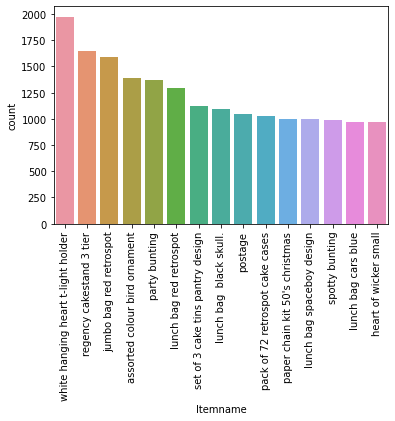

In [24]:
sns.countplot(x = 'Itemname', data = data, order = data['Itemname'].value_counts().iloc[:15].index)
plt.xticks(rotation=90)

## Market Basket Analysis

In [25]:
# Library

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [26]:
data = data.groupby(['BillNo','Itemname']).size().reset_index(name='count')
basket = (data.groupby(['BillNo','Itemname'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo','Itemname'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  after removing the cwd from sys.path.


Itemname,10 colour spaceboy pen,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 hanging eggs hand painted,12 ivory rose peg place settings,12 message cards with envelopes,12 pencil small tube woodland,12 pencils small tube red retrospot,12 pencils small tube skull,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
basket_sets.to_csv("baskets_sets.csv") # Export data yang sudah melalui data Pre-Processing ke dalam format CSV

In [28]:
#Menampilkan Kombinasi Produk 
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

# Catatan X antecendent dan y adalah consequent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
910,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.013379,0.035952,0.012002,0.897119,24.953107,0.011521,9.370545
604,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.022408,0.035952,0.019986,0.891892,24.807707,0.019180,8.917442
912,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer),0.013764,0.040412,0.012002,0.872000,21.577842,0.011446,7.496783
599,"(pink regency teacup and saucer, regency cakes...",(green regency teacup and saucer),0.015801,0.035952,0.013764,0.871080,24.228834,0.013196,7.477884
506,(poppy's playhouse livingroom),(poppy's playhouse kitchen),0.013434,0.018499,0.011452,0.852459,46.080991,0.011203,6.652395
905,"(pink regency teacup and saucer, regency cakes...",(roses regency teacup and saucer),0.015801,0.040412,0.013379,0.846690,20.951538,0.012740,6.259132
531,(regency tea plate green),(regency tea plate roses),0.013544,0.016572,0.011397,0.841463,50.775748,0.011172,6.203160
605,"(pink regency teacup and saucer, green regency...",(roses regency teacup and saucer),0.023785,0.040412,0.019986,0.840278,20.792868,0.019025,6.007856
560,(set/6 red spotty paper cups),(set/6 red spotty paper plates),0.015306,0.017398,0.012608,0.823741,47.346860,0.012342,5.574762
612,"(green regency teacup and saucer, regency cake...",(roses regency teacup and saucer),0.019160,0.040412,0.015746,0.821839,20.336598,0.014972,5.386076
